# Problem 1:

## a: NLP 
**Please discuss the recent trend of rapidly increasing sizes of NLP architectures.**

Recent NLP Research shows a scaling paradigm, where larger models consistently holds better generalization, reasoning and few-shot learning capabilities.

This trend Started with Transformer Based Architectures (2017), leading to exponential growth in model sizes, from millions to hundreds of billions of parameters within a few years. (GPT-4 with 1T parameters in 2024).
Larger models can capture more complex patterns in data, leading to better performance on a variety of NLP tasks.[1](https://arxiv.org/abs/2001.08361)

However, this trend also raises concerns about the environmental impact of training such large models, as well as issues related to accessibility and fairness in AI.[2](https://aclanthology.org/2025.acl-long.1163.pdf)

## b: Transfer Learning
### Classify the following example of transfer learning. More exactly, what are the domains and tasks, and which are being changed?

**Source: Using a step counter to monitor exercise in healthy people.**

**Target: Using a step counter to indicate recovery progression in a patient.**

| Aspect                                       | Source                         | Target                                                             | Changed?         |
| -------------------------------------------- | ------------------------------ | ------------------------------------------------------------------ | ---------------- |
| **Domain (input space + data distribution)** | Healthy individuals’ step data | Patients’ step data (different gait, frequency, recovery patterns) | ✅ Domain changed |
| **Task (objective function)**                | Monitor daily exercise         | Assess recovery progression                                        | ✅ Task changed   |

**Explanation:**
- **Source domain:** Healthy individuals’ step data, which is characterized by a certain range of step counts, gait patterns, and activity levels typical for non-rehabilitating individuals.
- **Target domain:** Patients’ step data, which may exhibit different characteristics due to factors like injury, recovery status, and rehabilitation progress.
- **Source task:** Monitoring daily exercise, which involves tracking step counts and activity levels to provide feedback on physical activity in healthy people. 
- **Target task:** Assessing recovery progression, which involves analyzing step data to evaluate how well a patient is recovering, potentially requiring different metrics and interpretations compared to monitoring exercise in healthy individuals.

- **Domain change:** DS ≠ DT (healthy people vs patients)→ space/distribution changed.
- **Task change:** TS ≠ TT (monitoring exercise vs assessing recovery)→ label/decision changed.

Since both domain and task differ, this is an **inductive transfer-learning** scenario (source task ≠ target task) with domain shift.

## c: Attention
#### Assume dotproduct attention, and that the hidden states of the encoder layer are [0,1,4],[-1,1,2],[1,1,1],[2,1,1]. If the activation for the previous decoder is [0.1,1,-2], what is the attention-context vector?



## d: Transformers
### Explain the 'positional encoding' step for transformers. Why is it done, how is it done?




## e: Bounding box detection:
**Given a dataset with two classes; cats and dogs, and the following detections:**
TP = True positive
FP = False positive

cat_det = [TP, FP, TP, FP, TP]
pred_scores_cat = [0.7, 0.3, 0.5, 0.6, 0.5]

dog_det = [FP, TP, TP, FP, TP, TP]
pred_scores_dog = [0.4, 0.3, 0.9, 0.5, 0.6, 0.7]


There are in total 3 cats and 4 dogs in the images.

**Calculate the mean average precision (mAP)**


## f: Semantic segmentation - FCN 1:
**Given an image sized 1024x768x3 (width x height x channels), with 7 classes. 
What is the size of the target image if targets are one-hot encoded?**


## g: Semantic segmentation - FCN 2: 
**What is a fully-convolutional network? When is it useful?**

## h:Residual Networks:
**Explain residual layers and their advantage.**

## i: Intersection-Over-Union
**Calculate the intersection over union in for these four bounding-boxes and target bounding boxes:**

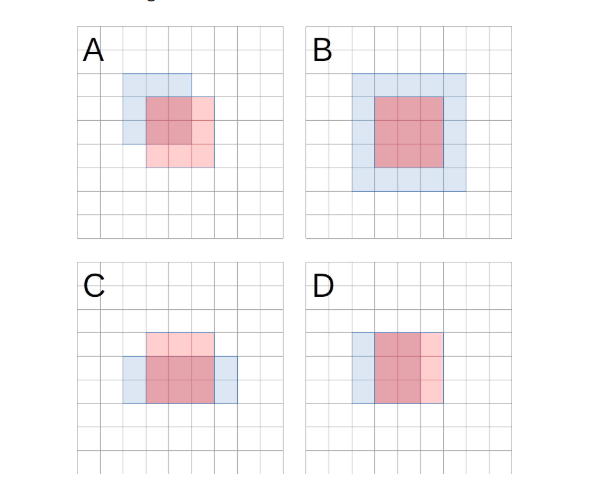

## j: Variational autoencoders:
**What are the strengths of a variational autoencoder (VAE) compared to an autoencoder (AE)?**

# Problem 2: 


## Using the dataset supplied below, create a neural network which can detect the ends of waveforms (marked by '1' in the labels).


## use the 'waveformLoader' as data loader for your training data, and 'testX,testy' as the test data. Report your performance as an average loss over the test data and with a plot of 'testy' and 'net(testX)' as a function of time, such as: 

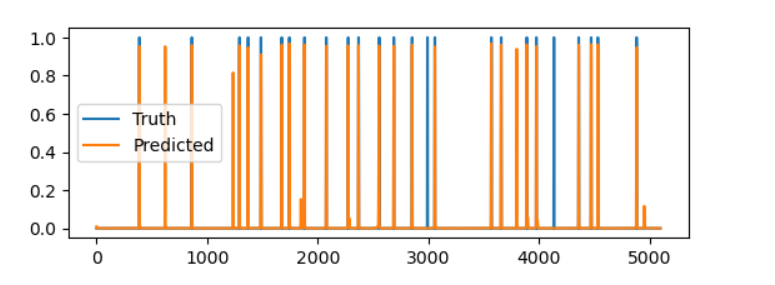